In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn import model_selection

In [8]:
colnames=['Cultivator','Alcohol','Malic_acid','Ash',' Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids',' Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline']

In [9]:
wine_df = pd.read_csv("wine.xls",names=colnames)

In [10]:
wine_df.head()

,Cultivator,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
wine_df.columns

Index(['Cultivator', 'Alcohol', 'Malic_acid', 'Ash', ' Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', ' Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [12]:
wine_df.shape

(178, 14)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


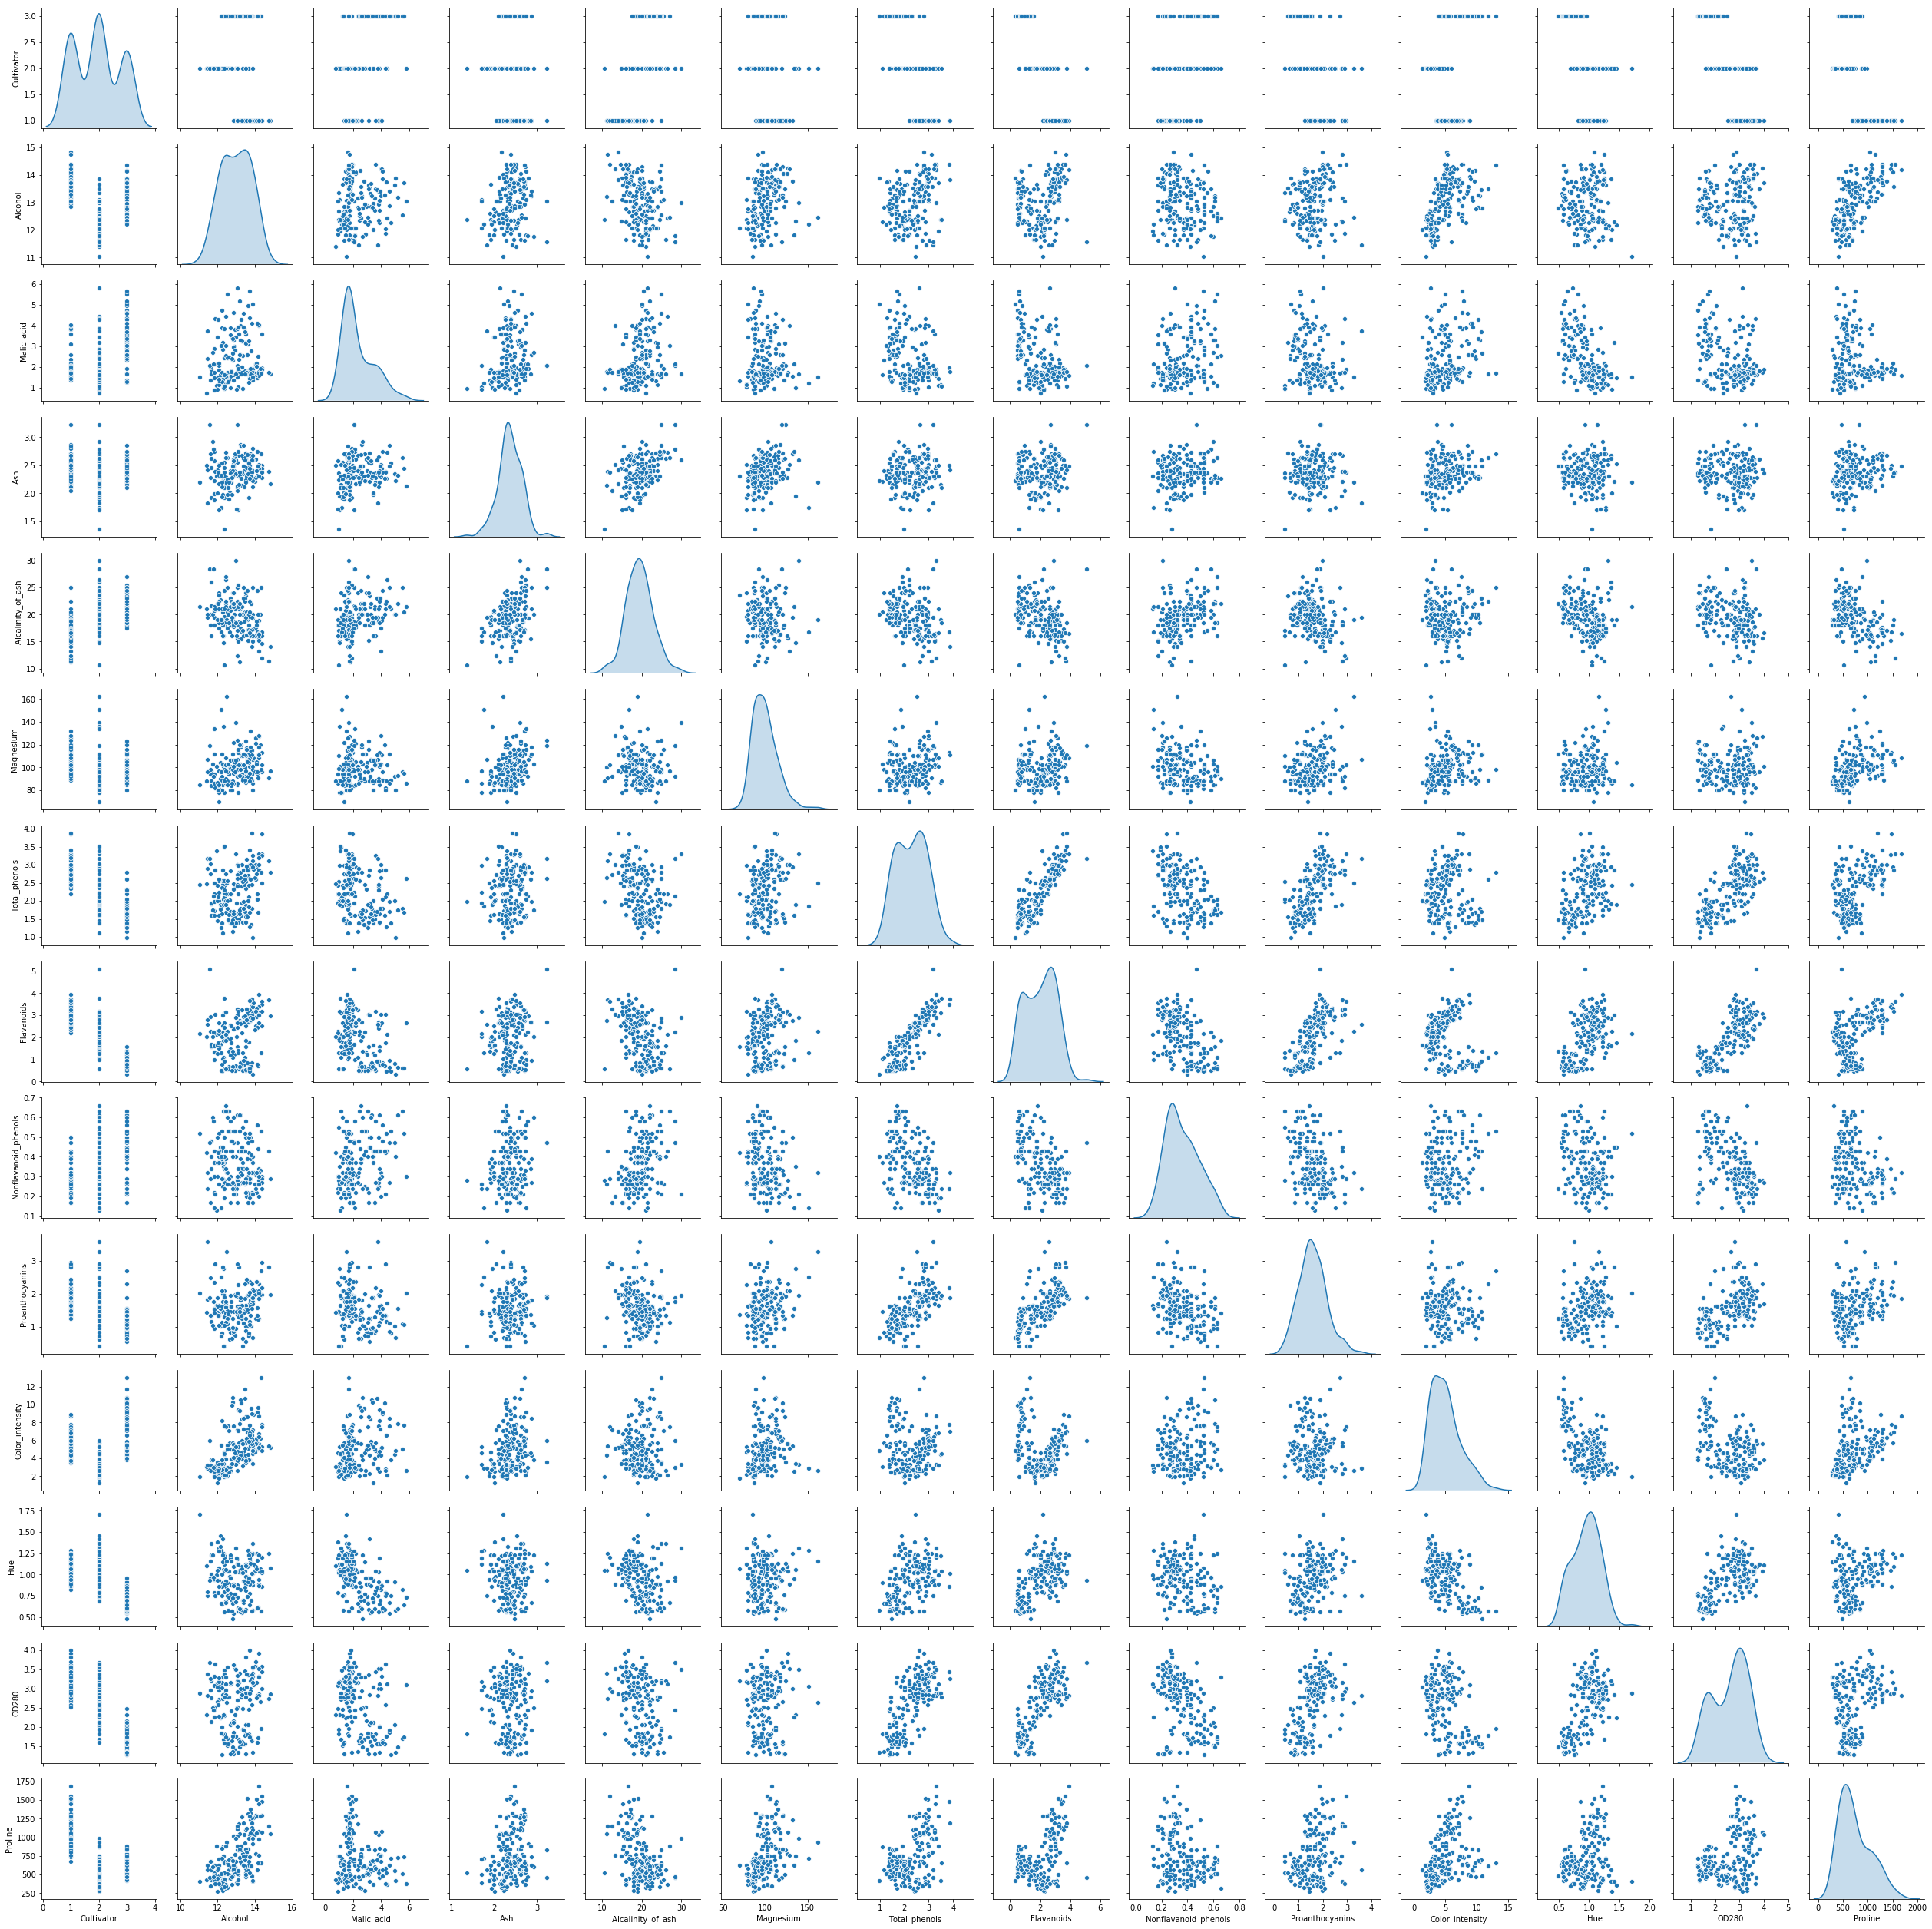

In [13]:
import seaborn as sns
sns.pairplot(wine_df,diag_kind='kde')

In [15]:
wine_df['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [16]:
X = wine_df[['Alcohol','Malic_acid','Ash',' Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids',' Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline']]
Y = wine_df['Cultivator']

# Standardization

In [17]:
X_std = StandardScaler().fit_transform(X)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(X_std,Y,test_size=0.3,random_state=2)

In [46]:
X_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [65]:
Dt_model = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3)

In [66]:
RF_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3)

In [67]:
RF_model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
ypred = RF_model.predict(xtest)
ypred

array([1, 1, 3, 1, 1, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 2, 1, 1, 1, 3, 3, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3, 1, 2, 3, 2, 2, 2, 3, 3, 2, 1,
       3, 2, 2, 1, 3, 1, 2, 2, 2, 2], dtype=int64)

In [69]:
acc = metrics.accuracy_score(ytest,ypred)
print(acc)

0.9814814814814815


In [70]:
cm = metrics.confusion_matrix(ytest,ypred)
print(cm)

[[20  0  0]
 [ 1 19  0]
 [ 0  0 14]]


In [71]:
cr = metrics.classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        14

   micro avg       0.98      0.98      0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [72]:
models = []
models.append(('DecisionTree',Dt_model))
models.append(('RandomForest',RF_model))
models

[('DecisionTree',
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
              max_depth=3, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False))]

DecisionTree:0.864921(0.059962)
RandomForest:0.944444(0.046481)


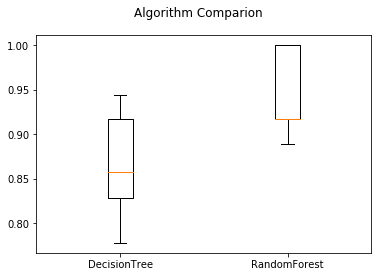

In [75]:
#evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    cv_results = model_selection.cross_val_score(model,X_std,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparion')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Using Grid Search to Find the Accurate Depth Parameter

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
#Perform Grid Search Method to find the optimal max_depth size

In [42]:
params = {'max_depth':np.arange(1,11)}
GS = GridSearchCV(model,params,cv=3)
GS.fit(X,Y)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
GS.best_params_

{'max_depth': 4}

In [44]:
GS.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [52]:
print(pd.DataFrame(model.feature_importances_,columns=["Imp"],index=xtrain.columns))

                            Imp
Alcohol                0.000000
Malic_acid             0.024662
Ash                    0.000000
 Alcalinity_of_ash     0.000000
Magnesium              0.000000
Total_phenols          0.000000
Flavanoids             0.433706
 Nonflavanoid_phenols  0.000000
Proanthocyanins        0.000000
Color_intensity        0.237675
Hue                    0.010313
OD280                  0.000000
Proline                0.293643


In [ ]:
from IPython.display import Image
from sklearn import tree
from os import system

Diabetic_Tree_File = open('diabetes_tree','w')
dot_data = tree.export_graphviz(model,out_file=Diabetic_Tree_File,feature_names=list(xtrain),class_names=list(ytrain))
Diabetic_Tree_File.close()